<a href="https://colab.research.google.com/github/aaceelll/Interpolasi-Rachel-Savitri-21120122140111/blob/main/Interpolasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Rachel Savitri - 21120122140111 - Kelas C

Polinom Langrange dan Polinom Newton

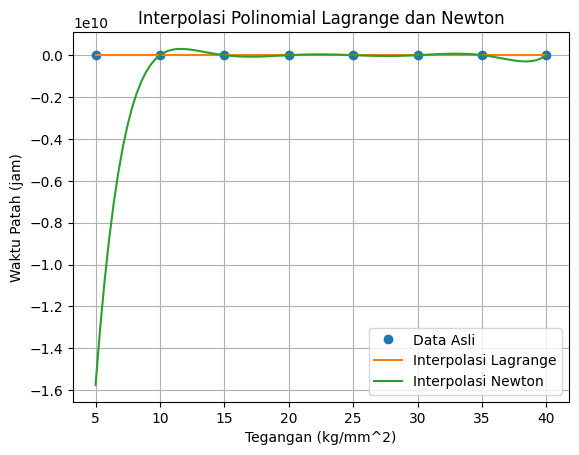

Interpolasi Lagrange untuk x = 22.5: 30.4189453125
Interpolasi Newton untuk x = 22.5: 38452148.4375


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Data tegangan dan waktu patah
tegangan = np.array([5, 10, 15, 20, 25, 30, 35, 40])
waktu_patah = np.array([40, 30, 25, 40, 18, 20, 22, 15])

# Fungsi interpolasi Lagrange
def interpolasi_lagrange(x, x_data, y_data):
    n = len(x_data)
    L = 0
    for i in range(n):
        product = 1
        for j in range(n):
            if j != i:
                product *= (x - x_data[j]) / (x_data[i] - x_data[j])
        L += y_data[i] * product
    return L

# Fungsi interpolasi Newton
def interpolasi_newton(x, x_data, y_data):
    n = len(x_data)
    a = np.zeros((n, n))
    for i in range(n):
        a[i, 0] = y_data[i]

    for j in range(1, n):
        for i in range(n - j):
            a[i, j] = (a[i + 1, j - 1] - a[i, j - 1]) / (x_data[i + j] - x_data[i])

    c = a[0, :]
    for i in range(1, n):
        for j in range(i):
            c[i] -= a[i, j] * c[j]

    L = c[0]
    for i in range(1, n):
        L *= (x - x_data[i])
    return L

# Interpolasi dengan Lagrange
x_interpolasi = np.linspace(5, 40, 100)
y_interpolasi_lagrange = []
for xi in x_interpolasi:
    yi = interpolasi_lagrange(xi, tegangan, waktu_patah)
    y_interpolasi_lagrange.append(yi)

# Interpolasi dengan Newton
y_interpolasi_newton = []
for xi in x_interpolasi:
    yi = interpolasi_newton(xi, tegangan, waktu_patah)
    y_interpolasi_newton.append(yi)

# Plot grafik
plt.plot(tegangan, waktu_patah, 'o', label='Data Asli')
plt.plot(x_interpolasi, y_interpolasi_lagrange, label='Interpolasi Lagrange')
plt.plot(x_interpolasi, y_interpolasi_newton, label='Interpolasi Newton')
plt.xlabel('Tegangan (kg/mm^2)')
plt.ylabel('Waktu Patah (jam)')
plt.title('Interpolasi Polinomial Lagrange dan Newton')
plt.legend()
plt.grid(True)
plt.show()

# Kode Testing
x_uji = 22.5
y_lagrange = interpolasi_lagrange(x_uji, tegangan, waktu_patah)
y_newton = interpolasi_newton(x_uji, tegangan, waktu_patah)

print(f"Interpolasi Lagrange untuk x = {x_uji}: {y_lagrange}")
print(f"Interpolasi Newton untuk x = {x_uji}: {y_newton}")
